<a href="https://colab.research.google.com/github/KomalPriya9320/KomalPriya9320/blob/main/Komalyesbankregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**

## **(Supervised - Regression)**

## <u>**Project by - *Komal Priyadarshini*** 

### **Data Science Trainee at AlmaBetter**

# **Problem Statement**

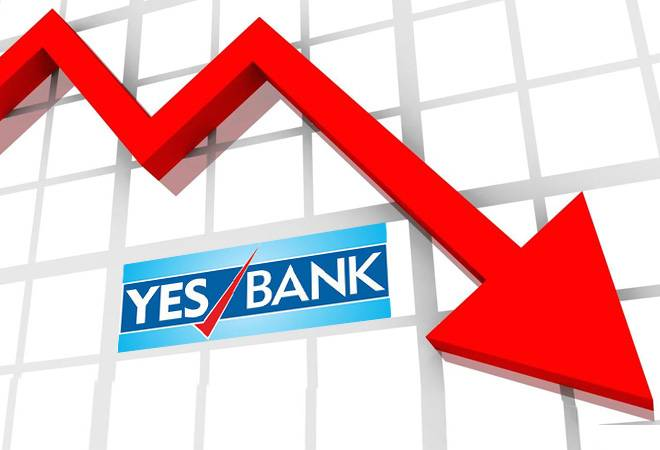

#### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

**Let's Get to know what is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Importing and Loading data**

In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
dataset = pd.read_csv('/content/data_YesBank_StockPrices.csv')
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


# **Data Exploration**

In [ ]:
#information of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#number of rows and columns 
dataset.shape

(185, 5)

This dataset has 185 observations in it with 5 columns(features)

In [ ]:
numerical_col = dataset.describe().columns

**Data Distribution and mean and median of each single Indpendent variable**

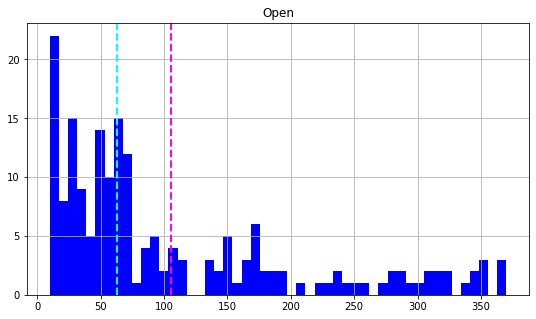

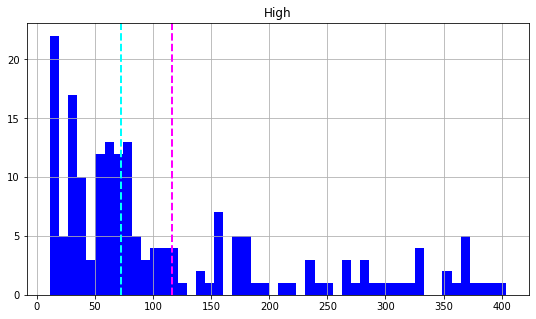

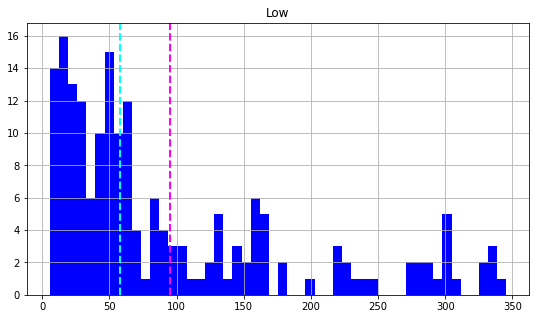

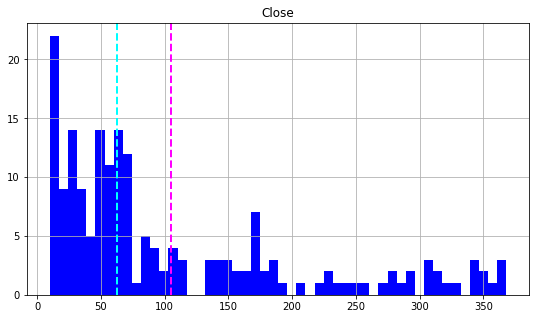

In [ ]:
for i in numerical_col[:]:
  fig = plt.figure(figsize=(9,5))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

# **Variable Identification and Understanding Data**

In [ ]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
#Decription of dataset 
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


With the help of describe we can conclude that data is not normally distributed as mean is higher than median in all features

In [ ]:
# Identify Numerical Columns
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

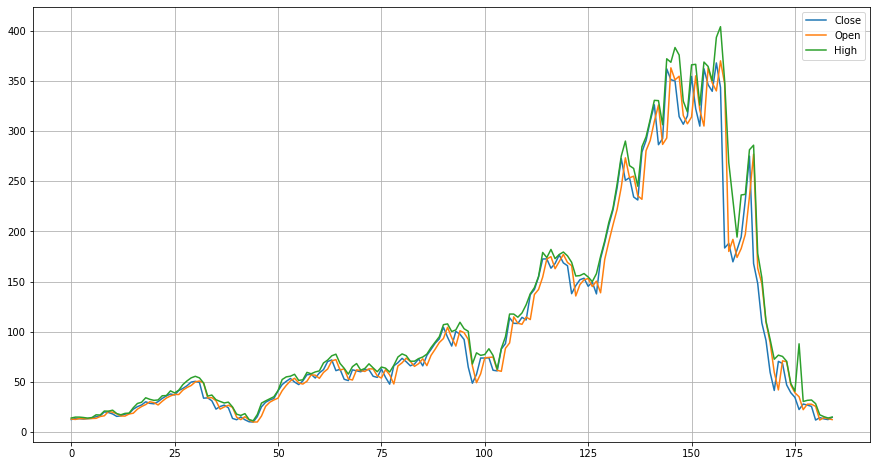

In [ ]:
# Line Plot
plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

## **Checking for NuN values and Outliers**

In [ ]:
# Checking Null Values
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# checking duplicate values
len(dataset[dataset.duplicated()])

0

# **Exploratory Data Analysis**

**Dependent Variable**

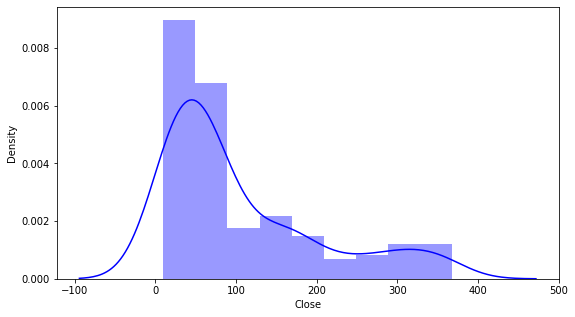

In [ ]:
plt.figure(figsize=(9,5))
sns.distplot(dataset['Close'],color='blue')
plt.show()

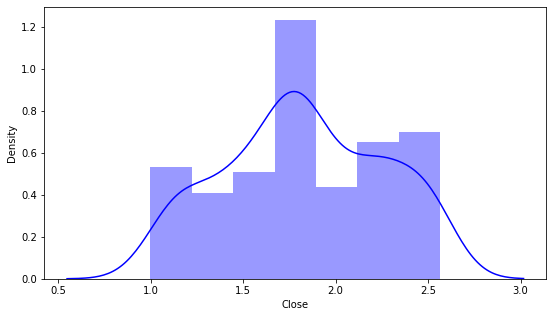

In [ ]:
# For normal Distribution 
plt.figure(figsize=(9,5))
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()


**Independent Variable**

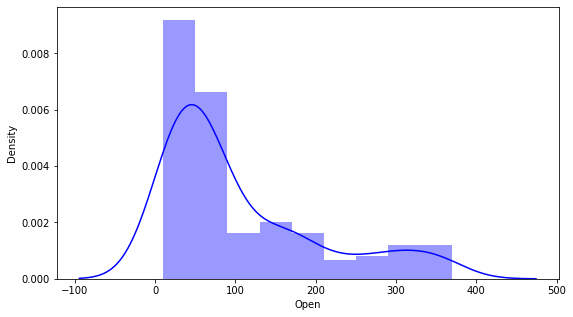

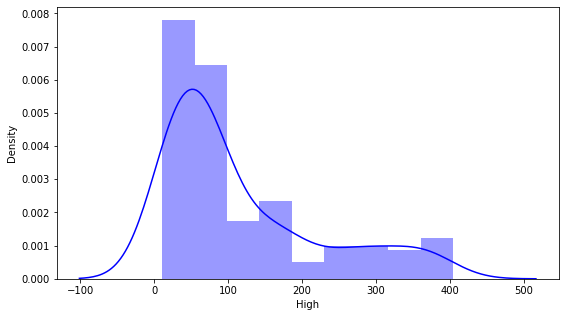

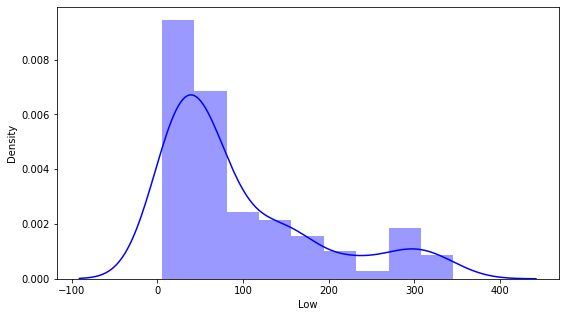

In [ ]:
# Independent variables
plt.figure(figsize=(9,5))
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(9,5))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(9,5))
sns.distplot(dataset['Low'], color='blue')

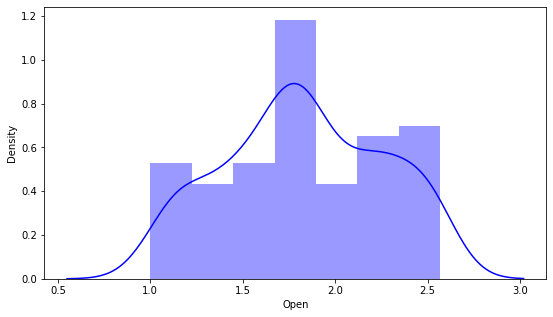

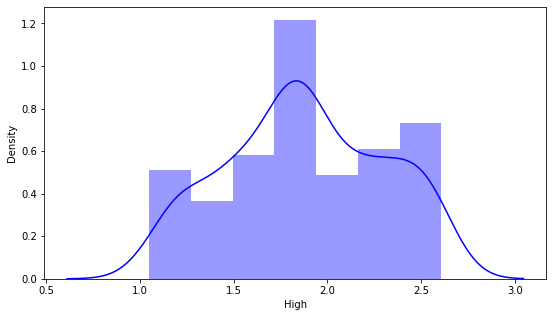

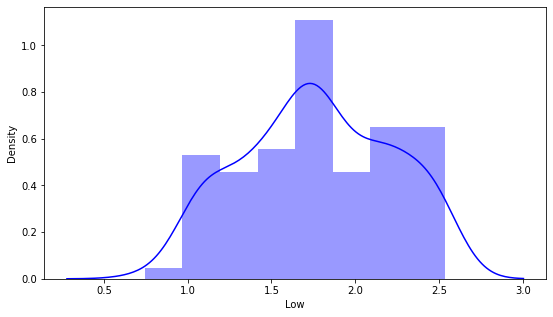

In [ ]:
plt.figure(figsize=(9,5))
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(9,5))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(9,5))
sns.distplot(np.log10(dataset['Low']), color='blue')

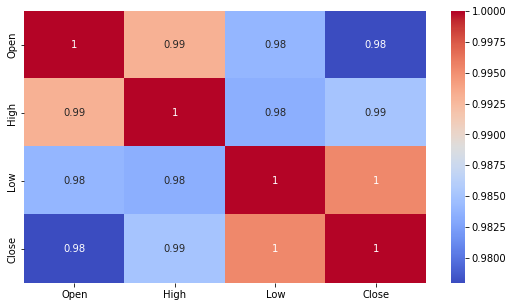

In [ ]:
# Correaltion Between the Variables
corr = dataset.corr()
plt.figure(figsize = (9,5))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

**Finding Correlation Between Variables**

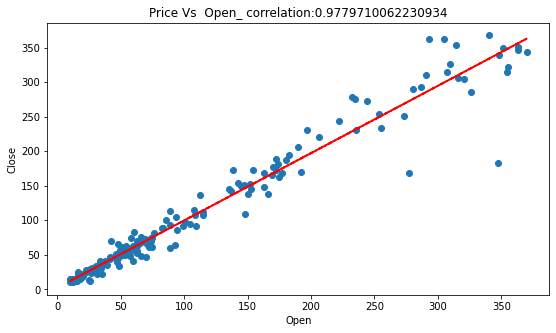

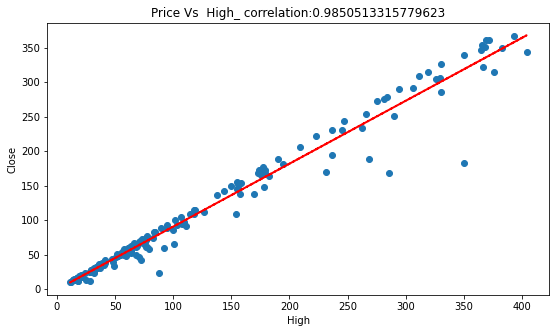

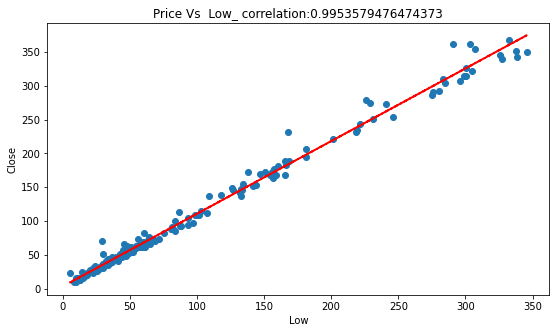

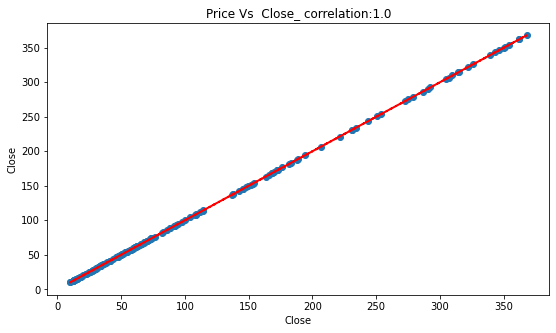

In [ ]:
for col in numerical_col[:]:
  fig = plt.figure(figsize = (9,5))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

**Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


<Figure size 648x360 with 0 Axes>

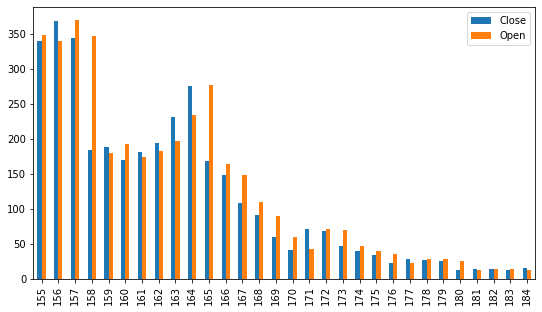

In [ ]:
plt.figure(figsize=(9,5))
dataset[['Close','Open']].tail(30).plot(kind='bar',figsize=(9,5))

# **Linear Regression Model**

**Normalization**

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = dataset.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(dataset['Close'])

**Train Test Split**

In [ ]:
# Creating Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


## **Linear Regression**

In [ ]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.8146653424416905

In [ ]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [ ]:
reg.intercept_

1.8292785179315048

In [ ]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

**Evaluation Matrics**

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_test_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_test_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_test_pred),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_train, y_train_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_train, y_train_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_train, y_train_pred),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.16

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.81



**Linear Regression Predication vs Actual**

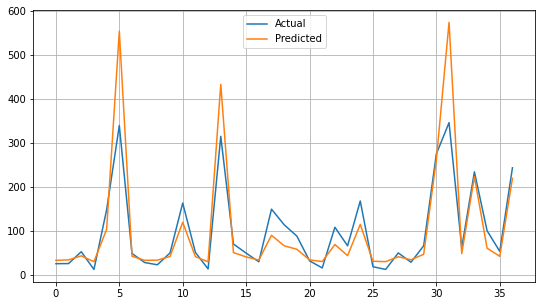

In [ ]:
# Linear Regression Plotting
plt.figure(figsize=(9,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

## **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)

In [ ]:
lasso.score(X_train,y_train)

0.8143673030311667

In [ ]:
y_lasso_pred = lasso.predict(X_test)

**Evaluation Matrics**

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_lasso_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_lasso_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_lasso_pred),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



**Lasso Predication vs Actual**

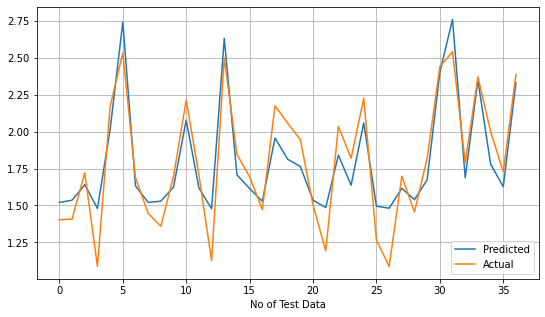

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

### **Cross Validification**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

**Evaluation Matrics**

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_pred_lasso),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_pred_lasso),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_pred_lasso),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



**Lasso Predication vs Actual (After Validification)**

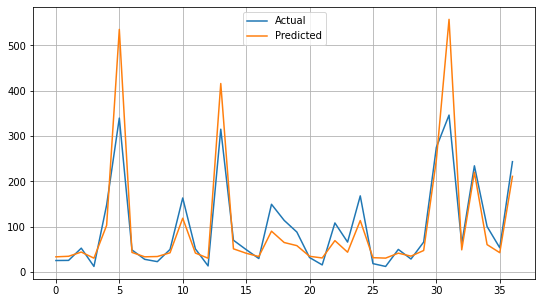

In [ ]:
# Lasso plotting
plt.figure(figsize=(9,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

## **Ridge Linear Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.81465524840887

In [ ]:
y_ridge_pred = ridge.predict(X_test)

**Evaluation Matrics**

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_ridge_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_ridge_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_ridge_pred),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



**Ridge Predication vs Actual**

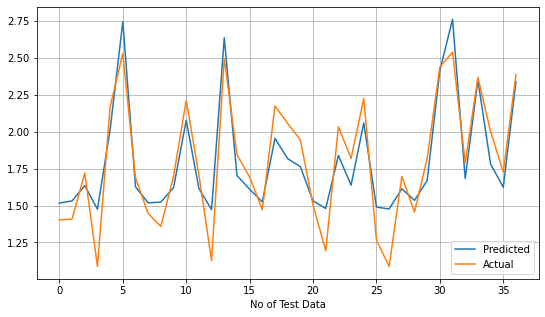

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

### **Cross Validification**

In [ ]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
# Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

**Evaluation Matrics**

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_pred_ridge),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_pred_ridge),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_pred_ridge),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



**Ridge Predication vs Actual (After Validification)**

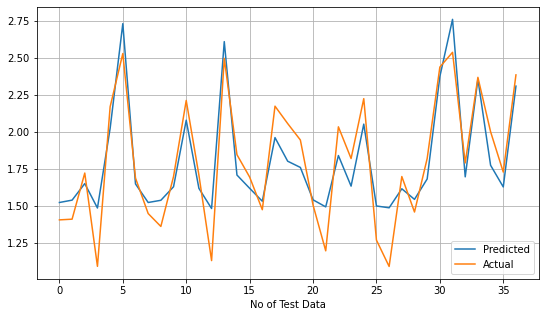

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

## **Elastic Net Linear Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_elastic_pred = elastic.predict(X_test)

**Evaluation Matrics**

mean absolute error: 0.15

mean squared error: 0.03

root mean squared error: 0.17

r2_score: 0.82



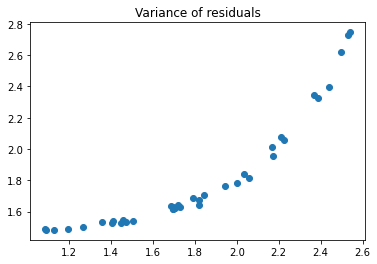

In [ ]:
# Test Performance
p_mae = round(mean_absolute_error(y_test, y_elastic_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, y_elastic_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, y_elastic_pred),2)
print('r2_score: {}\n'.format(p_r2))

# Check for homoscadacity
plt.scatter(y_test, y_elastic_pred)
plt.title('Variance of residuals')
plt.show()

**ElasticNet Predication vs Actual**

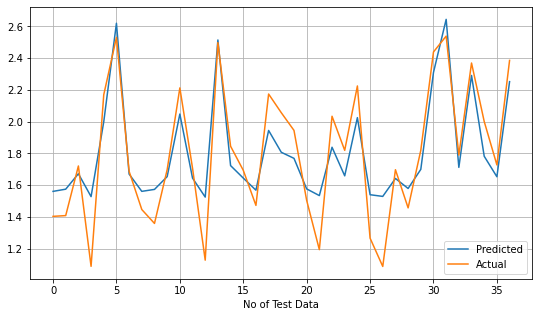

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

### **Cross Validification**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 1}

Using  {'alpha': 0.01, 'l1_ratio': 1}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_elastic_pred = elastic_model.predict(X_test)

**Evaluation Matrics**

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_elastic_pred )))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


**ElasticNet Predication vs Actual (After Validification)**

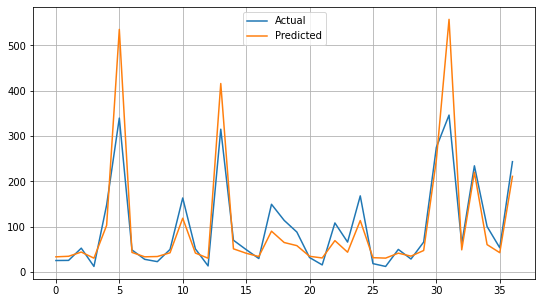

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# **Prophet Implementation**

In [ ]:
from prophet import Prophet

In [ ]:
# set data to train and test
dfp = dataset[['Date','Close']][175:]
split_date = '2020-05-01'
X_train = dfp.loc[dfp['Date'] <= split_date].copy()
X_test = dfp.loc[dfp['Date'] > split_date].copy()

In [ ]:
# rename columns appropriately
X_train = X_train.rename(columns={'Date':'ds','Close':'y'})
X_test = X_test.rename(columns={'Date':'ds','Close':'y'})

# select appropriate columns
X_test = X_test.drop(columns=['y'], axis=1)
X_test.reset_index(inplace=True)
X_test.drop(columns=['index'], axis=1, inplace=True)

In [ ]:
# Setup and fit the model
m = Prophet()
m.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hciujbh/e66otz35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hciujbh/br4pi0c4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13175', 'data', 'file=/tmp/tmp_hciujbh/e66otz35.json', 'init=/tmp/tmp_hciujbh/br4pi0c4.json', 'output', 'file=/tmp/tmp_hciujbh/prophet_modelp0jb9ong/prophet_model-20221114162732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:32 - cmdstanpy - INFO - Chain [1] start processing
INF

In [ ]:
# predicted closing prices
forecast = m.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-06-01,23.611262,18.528830,28.733189
1,2020-07-01,21.905517,16.718652,26.646296
2,2020-08-01,20.142914,14.998040,24.786883
3,2020-09-01,18.380311,13.460402,23.219235
4,2020-10-01,16.674566,11.984861,21.695285
5,2020-11-01,14.911963,10.059761,19.740776


In [ ]:
# actual closing prices
dataset[179:][['Date','Close']]

,Date,Close
179,2020-06-01,25.60
180,2020-07-01,11.95
181,2020-08-01,14.37
182,2020-09-01,13.15
183,2020-10-01,12.42
184,2020-11-01,14.67


In [ ]:
X_test = dataset[179:]['Close']
p_X_pred = forecast['yhat']

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# evaluate predictions
p_mae = round(mean_absolute_error(X_test, p_X_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(X_test, p_X_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(X_test, p_X_pred),2)
print('r2_score: {}\n'.format(p_r2))

mean absolute error: 4.57

mean squared error: 30.32

root mean squared error: 5.51

r2_score: -0.38



In [ ]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[p_mae,p_mae,p_mae,p_mae], 'mse':[p_mse,p_mse,p_mse,p_mse],'rmse':[p_rmse,p_rmse,p_rmse,p_rmse],'r2_score':[p_r2,p_r2,p_r2,p_r2]})
model_report

,model,mae,mse,rmse,r2_score
0,linear regression,0.15,0.03,0.17,0.82
1,ridge regression,0.15,0.03,0.17,0.82
2,lasso regression,0.15,0.03,0.17,0.82
3,elastic net regression,0.15,0.03,0.17,0.82


#Conclusion

  *  We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.  
  * A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error and r2_score.
  * Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.   
  * Regression models namely random forest regressor, xgboost regressor and support vector regressor were built.
  * The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.
  * Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.
  * Prophet model from facebook was implemented and predictions were made from it. 